## DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
project_data['project_submitted_datetime'][:3]

0    2016-12-05 13:43:57
1    2016-10-25 09:22:10
2    2016-08-31 12:03:56
Name: project_submitted_datetime, dtype: object

In [6]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [8]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [9]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [11]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:18<00:00, 549.05it/s]


In [20]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

In [21]:
#Adding processed columns at place of original columns
project_data['clean_essay'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [22]:
#Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 17695.99it/s]


In [23]:
# after preprocesing
print(preprocessed_titles[50])
print("="*50)
print(preprocessed_titles[500])
print("="*50)
print(preprocessed_titles[5000])
print("="*50)

empowering students through art s t e a m 3d printing
special needs students need additional access technology
mark time bookmarks


In [24]:
project_data['clean_title'] = preprocessed_titles

In [25]:
#replacing 3 nan values with "Mrs." since it was the most common one.
project_data['teacher_prefix'].replace(np.nan,'Mrs.',inplace=True)

<h3><font color='red'>1.3.3 Project grade category Text</font></h3>

In [26]:
#Combining all the above statemennts 
from tqdm import tqdm
preprocessed_grade = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_grade_category'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = sent.replace(" ","_")
    preprocessed_grade.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 37344.17it/s]


In [27]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
ct1 = Counter()
for word in preprocessed_grade:
    ct1.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(ct1)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

In [28]:
preprocessed_grade[:3]

['grades_prek_2', 'grades_3_5', 'grades_prek_2']

In [29]:
project_data[:3]

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   
2           CA 2016-04-27 00:46:53          Grades PreK-2   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   
2  My students need a mobile listening center to ...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   
2                                            10                    1  329.00   

   quantity   clean_categories                 clean_subcategories  \
0         4       Math_Science  AppliedSciences Health_LifeScience   
1         8       SpecialNeeds                        SpecialNeeds   
2         1  Literacy_Language                            Literacy   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   

                                         clean_essay  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   
2  class 24 students comes diverse learners stude...   

                               clean_title  
0      engineering steam primary classroom  
1                      sensory tools focus  
2  mobile learning mobile listening center

## 1.5 Introducing new feature "Number of Words in Title"

In [30]:
title_word_count = []

for a in project_data["clean_title"] :
    b = len(a.split())
    title_word_count.append(b)

project_data["title_word_count"] = title_word_count

## 1.6 Introducing new feature "Number of Words in Essay"

In [31]:
essay_word_count = []

for a in project_data["clean_essay"] :
    b = len(a.split())
    essay_word_count.append(b)

project_data["essay_word_count"] = essay_word_count

## 1.7 Calculate Sentiment Scores for the essays

In [32]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WIN8\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
from tqdm import tqdm
analyze = SentimentIntensityAnalyzer()

neg = []
pos = []
neu = []
compound = []

for a in tqdm(project_data["clean_essay"]) :
    b = analyze.polarity_scores(a)['neg']
    c = analyze.polarity_scores(a)['pos']
    d = analyze.polarity_scores(a)['neu']
    e = analyze.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|██████████████████████████████████████████████████████████████████████████| 109248/109248 [40:42<00:00, 44.74it/s]


In [34]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

In [35]:
project_data.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   
2           CA 2016-04-27 00:46:53          Grades PreK-2   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   
2  My students need a mobile listening center to ...   

   teacher_number_of_previously_posted_projects  ...  \
0                                            53  ...   
1                                             4  ...   
2                                            10  ...   

                  clean_subcategories  \
0  AppliedSciences Health_LifeScience   
1                        SpecialNeeds   
2                            Literacy   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   

                                         clean_essay  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   
2  class 24 students comes diverse learners stude...   

                               clean_title title_word_count essay_word_count  \
0      engineering steam primary classroom                4              156   
1                      sensory tools focus                3              159   
2  mobile learning mobile listening center                5              106   

     pos    neg    neu  compound  
0  0.214  0.013  0.773    0.9867  
1  0.272  0.078  0.650    0.9899  
2  0.278  0.016  0.706    0.9864  

[3 rows x 24 columns]

## 1.5 Preparing data for models

In [36]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essay', 'clean_title', 'title_word_count', 'essay_word_count',
       'pos', 'neg', 'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [37]:
y = project_data['project_is_approved']
type(y)

pandas.core.series.Series

In [38]:
X = project_data.drop(['project_is_approved'], axis=1)
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   

   teacher_number_of_previously_posted_projects  ...  \
0                                            53  ...   

                  clean_subcategories  \
0  AppliedSciences Health_LifeScience   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   

                                         clean_essay  \
0  fortunate enough use fairy tale stem kits clas...   

                           clean_title title_word_count essay_word_count  \
0  engineering steam primary classroom                4              156   

     pos    neg    neu  compound  
0  0.214  0.013  0.773    0.9867  

[1 rows x 24 columns]

In [39]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [40]:
y_train.head(2)

34291    1
740      1
Name: project_is_approved, dtype: int64

In [41]:
X_train.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
34291      138496  p000976  ebe7bade2a8121b2c5ecf50c14224436           Mrs.   

      school_state                Date project_grade_category  \
34291           OH 2016-08-22 18:16:36          Grades PreK-2   

                                           project_title  \
34291  Wiggle Station: Active, Hands On, Minds On in ...   

                                project_resource_summary  \
34291  My students need An Osmo Genius, Tiggly games,...   

       teacher_number_of_previously_posted_projects  ...  clean_subcategories  \
34291                                             3  ...      Health_Wellness   

                                                   essay  \
34291  My classroom is made up of 25 eager, energetic...   

                                             clean_essay  \
34291  classroom made 25 eager energetic hard working...   

                                             clean_title title_word_count  \
34291  wiggle station active hands on minds on first ...                9   

      essay_word_count    pos   neg    neu  compound  
34291              212  0.243  0.05  0.708     0.994  

[1 rows x 23 columns]

## SIMPLE UPSAMPLING ON TRAIN DATA

In [42]:
upsample = X_train
upsample['project_is_approved'] = y_train
upsample.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
34291      138496  p000976  ebe7bade2a8121b2c5ecf50c14224436           Mrs.   

      school_state                Date project_grade_category  \
34291           OH 2016-08-22 18:16:36          Grades PreK-2   

                                           project_title  \
34291  Wiggle Station: Active, Hands On, Minds On in ...   

                                project_resource_summary  \
34291  My students need An Osmo Genius, Tiggly games,...   

       teacher_number_of_previously_posted_projects  ...  \
34291                                             3  ...   

                                                   essay  \
34291  My classroom is made up of 25 eager, energetic...   

                                             clean_essay  \
34291  classroom made 25 eager energetic hard working...   

                                             clean_title title_word_count  \
34291  wiggle station active hands on minds on first ...                9   

      essay_word_count    pos   neg    neu  compound  project_is_approved  
34291              212  0.243  0.05  0.708     0.994                    1  

[1 rows x 24 columns]

In [43]:
negative = upsample.loc[project_data['project_is_approved'] == 0]
print(len(negative))
positive = upsample.loc[project_data['project_is_approved'] == 1]
len(positive)

7426


41615

In [44]:
#https://elitedatascience.com/imbalanced-classes
from sklearn.utils import resample

negative_upsampled = resample(negative, 
                                 replace=True,               # sample with replacement
                                 n_samples=len(positive),    # to match majority class
                                 random_state=123)           # reproducible results

In [45]:
len(negative_upsampled)

41615

In [46]:
upsample = pd.concat([negative_upsampled, positive])
len(upsample)

83230

In [47]:
y_train = upsample['project_is_approved']
X_train = upsample.drop(['project_is_approved'], axis=1)
print(len(y_train))
len(X_train)

83230


83230

In [48]:
print(y_train.head(1))
print("="*100)
X_train.head(1)

68109    0
Name: project_is_approved, dtype: int64


Unnamed: 0       id                        teacher_id teacher_prefix  \
68109       29360  p033554  b43150dfeb1c3084a755e98e4e37bb7e            Ms.   

      school_state                Date project_grade_category  \
68109           DC 2016-11-17 12:05:53          Grades PreK-2   

           project_title                           project_resource_summary  \
68109  Little Listeners!  My students need new furniture designed to cre...   

       teacher_number_of_previously_posted_projects  ...  clean_subcategories  \
68109                                             2  ...   Music SpecialNeeds   

                                                   essay  \
68109  My students are eager to learn and understand ...   

                                             clean_essay       clean_title  \
68109  students eager learn understand environment mu...  little listeners   

      title_word_count essay_word_count    pos    neg    neu  compound  
68109                2              160  0.298  0.061  0.641    0.9915  

[1 rows x 23 columns]

<h2>2.2 Make Data Model Ready: encoding categorical features</h2> 

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [49]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer

#fit using only train data
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)

X_train_cat = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cat = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cat = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cat.shape, y_train.shape)
print(X_cv_cat.shape, y_cv.shape)
print(X_test_cat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(83230, 9) (83230,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [50]:
# fit using only train data
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_subcat = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcat = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcat = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcat.shape, y_train.shape)
print(X_cv_subcat.shape, y_cv.shape)
print(X_test_subcat.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(83230, 30) (83230,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [51]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_train_state = vectorizer.transform(X_train['school_state'].values)
X_cv_state = vectorizer.transform(X_cv['school_state'].values)
X_test_state = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state.shape, y_train.shape)
print(X_cv_state.shape, y_cv.shape)
print(X_test_state.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(83230, 51) (83230,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [52]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

X_train_prefix = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_prefix = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_prefix = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_prefix.shape, y_train.shape)
print(X_cv_prefix.shape, y_cv.shape)
print(X_test_prefix.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(83230, 5) (83230,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [53]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values.astype('U'))

X_train_grade = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade.shape, y_train.shape)
print(X_cv_grade.shape, y_cv.shape)
print(X_test_grade.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(83230, 4) (83230,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_9_12', 'grades_6_8', 'grades_3_5', 'grades_prek_2']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

#### Bag of words

In [54]:
vectorizer_bow = CountVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer_bow.fit(X_train['clean_essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_bow.transform(X_train['clean_essay'].values)
X_cv_essay_bow = vectorizer_bow.transform(X_cv['clean_essay'].values)
X_test_essay_bow = vectorizer_bow.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(83230, 5000) (83230,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [55]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['clean_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['clean_title'].values)
X_test_title_bow = vectorizer.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(83230, 4537) (83230,)
(24155, 4537) (24155,)
(36052, 4537) (36052,)


####  TFIDF vectorizer

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=10)
# text_tfidf = vectorizer.fit_transform(preprocessed_essays)
# print("Shape of matrix after one hot encodig ",text_tfidf.shape)
vectorizer_tfidf = TfidfVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer_tfidf.fit(X_train['clean_essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer_tfidf.transform(X_train['clean_essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf.transform(X_cv['clean_essay'].values)
X_test_essay_tfidf = vectorizer_tfidf.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(83230, 5000) (83230,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


In [57]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['clean_title'].values)
X_cv_title_tfidf = vectorizer.transform(X_cv['clean_title'].values)
X_test_title_tfidf = vectorizer.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(83230, 4537) (83230,)
(24155, 4537) (24155,)
(36052, 4537) (36052,)


#### Using Pretrained Models: Avg W2V

In [58]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [59]:
# average Word2Vec for train
# compute average word2vec for each review.
train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors.append(vector)

print("TRAIN VECTOR")
print(len(train_avg_w2v_vectors))
print(len(train_avg_w2v_vectors[0]))
print("="*50)

# average Word2Vec for CV data
cv_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_vectors.append(vector)

print("CV VECTOR")
print(len(cv_avg_w2v_vectors))
print(len(cv_avg_w2v_vectors[0]))
print("="*50)

# average Word2Vec for test data
test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors.append(vector)

print("TEST VECTOR")
print(len(test_avg_w2v_vectors))
print(len(test_avg_w2v_vectors[0]))
print("="*50)

100%|███████████████████████████████████████████████████████████████████████████| 83230/83230 [01:51<00:00, 748.72it/s]


TRAIN VECTOR
83230
300


100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:30<00:00, 800.93it/s]


CV VECTOR
24155
300


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [00:49<00:00, 723.23it/s]


TEST VECTOR
36052
300


<h2>2.4 Make Data Model Ready: encoding numericalfeatures</h2> 

### PRICE

In [65]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

price_scalar = StandardScaler(with_mean = False)
price_scalar.fit(X_train['price'].values.reshape(-1,1))

X_train_price_std = price_scalar.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_std = price_scalar.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_std = price_scalar.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_cv_price_std.shape, y_cv.shape)
print(X_test_price_std.shape, y_test.shape)
print("="*100)

After vectorizations
(83230, 1) (83230,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### PREVIOUSLY POSTED PROJECTS

In [66]:
stdz = StandardScaler(with_mean = False)

stdz.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_projects_std = stdz.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_projects_std = stdz.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_projects_std = stdz.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_projects_std.shape, y_train.shape)
print(X_cv_projects_std.shape, y_cv.shape)
print(X_test_projects_std.shape, y_test.shape)
print("="*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(83230, 1) (83230,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### QUANTITY

In [67]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

quantity_scalar = StandardScaler(with_mean = False)
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_std = price_scalar.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity_std = price_scalar.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_std = price_scalar.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_std.shape, y_train.shape)
print(X_cv_quantity_std.shape, y_cv.shape)
print(X_test_quantity_std.shape, y_test.shape)
print("="*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(83230, 1) (83230,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### ESSAY WORD COUNT

In [68]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

essay_word_count_scalar = StandardScaler(with_mean = False)
essay_word_count_scalar.fit(X_train['essay_word_count'].values.reshape(-1,1))

X_train_essay_word_count_std = essay_word_count_scalar.transform(X_train['essay_word_count'].values.reshape(-1,1))
X_cv_essay_word_count_std = essay_word_count_scalar.transform(X_cv['essay_word_count'].values.reshape(-1,1))
X_test_essay_word_count_std = essay_word_count_scalar.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_essay_word_count_std.shape, y_train.shape)
print(X_cv_essay_word_count_std.shape, y_cv.shape)
print(X_test_essay_word_count_std.shape, y_test.shape)
print("="*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(83230, 1) (83230,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### TITLE WORD COUNT

In [69]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

title_word_count_scalar = StandardScaler(with_mean = False)
title_word_count_scalar.fit(X_train['title_word_count'].values.reshape(-1,1))

X_train_title_word_count_std = title_word_count_scalar.transform(X_train['title_word_count'].values.reshape(-1,1))
X_cv_title_word_count_std = title_word_count_scalar.transform(X_cv['title_word_count'].values.reshape(-1,1))
X_test_title_word_count_std = title_word_count_scalar.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_title_word_count_std.shape, y_train.shape)
print(X_cv_title_word_count_std.shape, y_cv.shape)
print(X_test_title_word_count_std.shape, y_test.shape)
print("="*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(83230, 1) (83230,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### SENTIMENTS: POSITIVE, NEGATIVE, NEUTRAL

In [70]:
pos_scalar = StandardScaler(with_mean = False)
pos_scalar.fit(X_train['pos'].values.reshape(-1,1))

pos_train = pos_scalar.transform(X_train['pos'].values.reshape(-1,1))
pos_cv = pos_scalar.transform(X_cv['pos'].values.reshape(-1,1))
pos_test = pos_scalar.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(pos_train.shape, y_train.shape)
print(pos_cv.shape, y_cv.shape)
print(pos_test.shape, y_test.shape)
print("="*100)

After vectorizations
(83230, 1) (83230,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [71]:
neg_scalar = StandardScaler(with_mean = False)
neg_scalar.fit(X_train['neg'].values.reshape(-1,1))

neg_train = neg_scalar.transform(X_train['neg'].values.reshape(-1,1))
neg_cv = neg_scalar.transform(X_cv['neg'].values.reshape(-1,1))
neg_test = neg_scalar.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(neg_train.shape, y_train.shape)
print(neg_cv.shape, y_cv.shape)
print(neg_test.shape, y_test.shape)
print("="*100)

After vectorizations
(83230, 1) (83230,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [72]:
neu_scalar = StandardScaler(with_mean = False)
neu_scalar.fit(X_train['neu'].values.reshape(-1,1))

neu_train = neu_scalar.transform(X_train['neu'].values.reshape(-1,1))
neu_cv = neu_scalar.transform(X_cv['neu'].values.reshape(-1,1))
neu_test = neu_scalar.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(neu_train.shape, y_train.shape)
print(neu_cv.shape, y_cv.shape)
print(neu_test.shape, y_test.shape)
print("="*100)

After vectorizations
(83230, 1) (83230,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [73]:
comp_scalar = StandardScaler(with_mean = False)
comp_scalar.fit(X_train['compound'].values.reshape(-1,1))

comp_train = comp_scalar.transform(X_train['compound'].values.reshape(-1,1))
comp_cv = comp_scalar.transform(X_cv['compound'].values.reshape(-1,1))
comp_test = comp_scalar.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(comp_train.shape, y_train.shape)
print(comp_cv.shape, y_cv.shape)
print(comp_test.shape, y_test.shape)
print("="*100)

After vectorizations
(83230, 1) (83230,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 2.5.1 Applying Support Vector Machines on BOW,<font color='red'> SET 1</font>

In [74]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_title_bow,X_train_cat,X_train_subcat, X_train_state, X_train_prefix, X_train_grade, X_train_price_std,X_train_projects_std,X_train_title_word_count_std,X_train_essay_word_count_std,X_train_quantity_std,pos_train,neg_train,neu_train,comp_train)).tocsr()
X_cr = hstack((X_cv_essay_bow,X_cv_title_bow,X_cv_cat,X_cv_subcat, X_cv_state, X_cv_prefix, X_cv_grade, X_cv_price_std,X_cv_projects_std,X_cv_title_word_count_std,X_cv_essay_word_count_std,X_cv_quantity_std,pos_cv,neg_cv,neu_cv,comp_cv)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_title_bow,X_test_cat,X_test_subcat, X_test_state, X_test_prefix, X_test_grade, X_test_price_std,X_test_projects_std,X_test_title_word_count_std,X_test_essay_word_count_std,X_test_quantity_std,pos_test,neg_test,neu_test,comp_test)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(83230, 9645) (83230,)
(24155, 9645) (24155,)
(36052, 9645) (36052,)


In [75]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

## L2 regularization

100%|███████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 13022.68it/s]


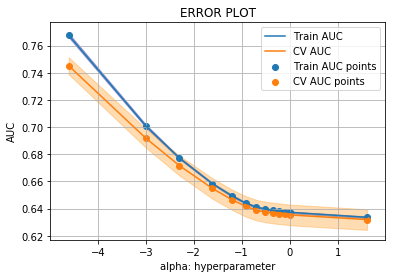

In [76]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""
log_alpha = []

svm = SGDClassifier(loss='hinge', penalty='l2',class_weight='balanced')
parameters = {'alpha':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0]}
clf = GridSearchCV(svm, parameters, cv= 10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


for i in tqdm(parameters['alpha']):
    a = math.log(i)
    log_alpha.append(a)
    
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
plt.grid()
plt.show()

#### Best alpha=0.05

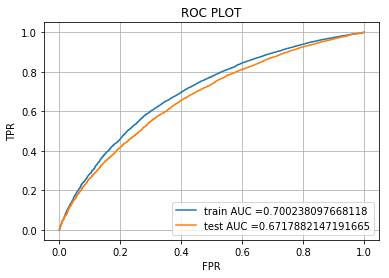

In [77]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

best_alpha = .05
svm = SGDClassifier(loss='hinge', penalty='l2',alpha=.05,class_weight='balanced')
svm.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_tr)   
y_test_pred = svm.decision_function(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()

In [78]:
#function to get heatmap confusion matrix
def get_confusion_matrix(clf,X_te,y_test):
    y_pred = clf.predict(X_te)
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Wall time: 1.27 s


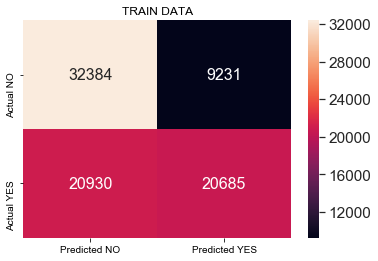

In [79]:
%%time
import matplotlib.pyplot as plt

plt.title('TRAIN DATA')
get_confusion_matrix(svm,X_tr,y_train)

Wall time: 492 ms


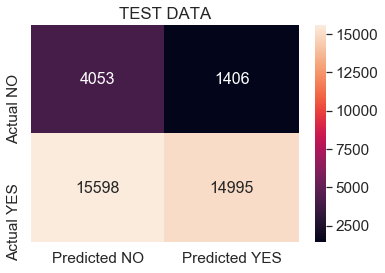

In [80]:
%%time
import matplotlib.pyplot as plt

plt.title('TEST DATA')
get_confusion_matrix(svm,X_te,y_test)

## Penalty = L1 reg.

100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 9009.24it/s]


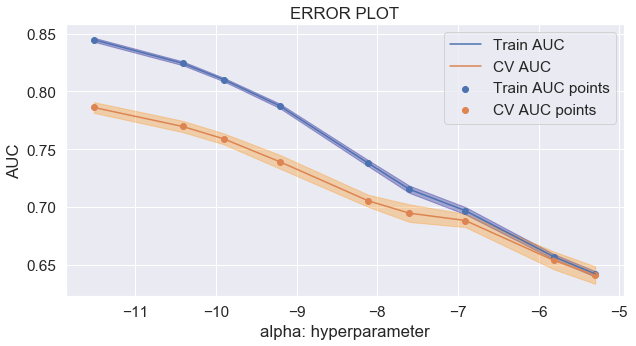

Wall time: 2min 31s


In [86]:
%%time
log_alpha = []

svm = SGDClassifier(loss='hinge', penalty='l1',class_weight='balanced')
parameters = {'alpha':[0.00001,0.00003,0.00005,0.0001,0.0003, 0.0005, 0.001,0.003, 0.005]}
clf = GridSearchCV(svm, parameters, cv= 10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


for i in tqdm(parameters['alpha']):
    a = math.log(i)
    log_alpha.append(a)
    
plt.figure(figsize=(10,5))
    
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
#plt.grid()
plt.show()

### Best alpha=.001

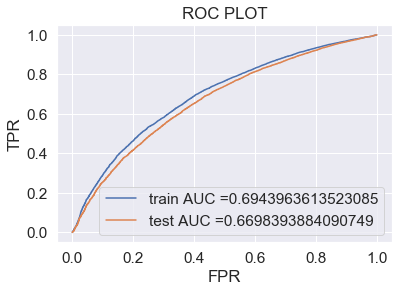

In [87]:
svm = SGDClassifier(loss='hinge', penalty='l1',alpha=0.001,class_weight='balanced')
svm.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_tr)   
y_test_pred = svm.decision_function(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
#plt.grid()
plt.show()

Wall time: 809 ms


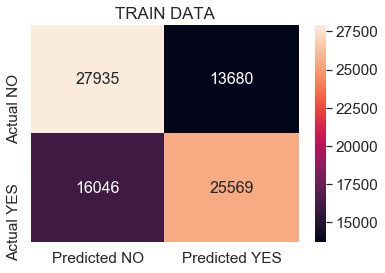

In [88]:
%%time
import matplotlib.pyplot as plt

plt.title('TRAIN DATA')
get_confusion_matrix(svm,X_tr,y_train)

Wall time: 392 ms


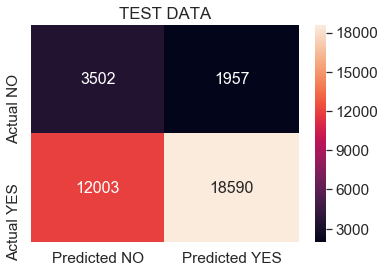

In [89]:
%%time
import matplotlib.pyplot as plt

plt.title('TEST DATA')
get_confusion_matrix(svm,X_te,y_test)

### 2.5.2 Applying Support Vector Machines on TFIDF,<font color='red'> SET 2</font>

In [90]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_title_tfidf,X_train_cat,X_train_subcat, X_train_state, X_train_prefix, X_train_grade, X_train_price_std,X_train_projects_std,X_train_title_word_count_std,X_train_essay_word_count_std,X_train_quantity_std,pos_train,neg_train,neu_train,comp_train)).tocsr()
X_cr = hstack((X_cv_essay_tfidf,X_cv_title_tfidf,X_cv_cat,X_cv_subcat, X_cv_state, X_cv_prefix, X_cv_grade, X_cv_price_std,X_cv_projects_std,X_cv_title_word_count_std,X_cv_essay_word_count_std,X_cv_quantity_std,pos_cv,neg_cv,neu_cv,comp_cv)).tocsr()
X_te = hstack((X_test_essay_tfidf,X_test_title_tfidf,X_test_cat,X_test_subcat, X_test_state, X_test_prefix, X_test_grade, X_test_price_std,X_test_projects_std,X_test_title_word_count_std,X_test_essay_word_count_std,X_test_quantity_std,pos_test,neg_test,neu_test,comp_test)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(83230, 9645) (83230,)
(24155, 9645) (24155,)
(36052, 9645) (36052,)


## Penalty = L2 reg.

100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 8989.93it/s]


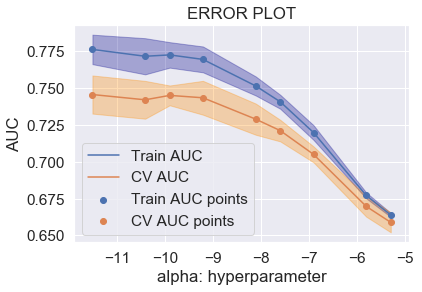

Wall time: 45 s


In [92]:
%%time
log_alpha = []

svm = SGDClassifier(loss='hinge', penalty='l2',class_weight='balanced')
parameters = {'alpha':[0.00001,0.00003,0.00005,0.0001,0.0003, 0.0005, 0.001,0.003, 0.005]}
clf = GridSearchCV(svm, parameters, cv= 10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


for i in tqdm(parameters['alpha']):
    a = math.log(i)
    log_alpha.append(a)
    
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
#plt.grid()
plt.show()

#### Best alpha=.0005

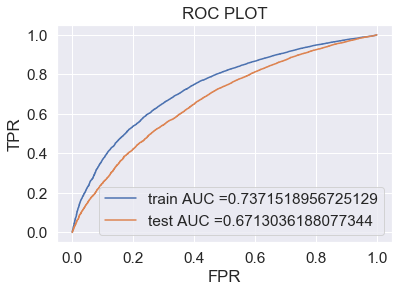

In [96]:
svm = SGDClassifier(loss='hinge', penalty='l2',alpha=.0005,class_weight='balanced')
svm.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_tr)   
y_test_pred = svm.decision_function(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
#plt.grid()
plt.show()

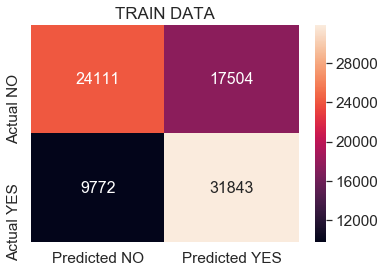

In [97]:
plt.title('TRAIN DATA')
get_confusion_matrix(svm,X_tr,y_train)

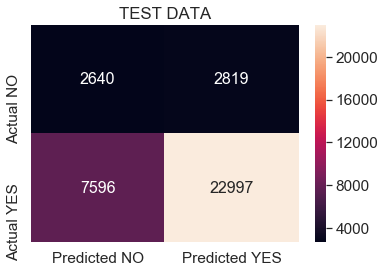

In [98]:
plt.title('TEST DATA')
get_confusion_matrix(svm,X_te,y_test)

## Penalty = L1 reg.

100%|████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


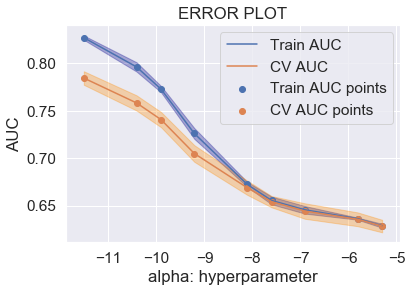

Wall time: 1min 6s


In [99]:
%%time
log_alpha = []

svm = SGDClassifier(loss='hinge', penalty='l1',class_weight='balanced')
parameters = {'alpha':[0.00001,0.00003,0.00005,0.0001,0.0003, 0.0005, 0.001,0.003, 0.005]}
clf = GridSearchCV(svm, parameters, cv= 10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


for i in tqdm(parameters['alpha']):
    a = math.log(i)
    log_alpha.append(a)
    
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
#plt.grid()
plt.show()

### Best alpha= 0.0001

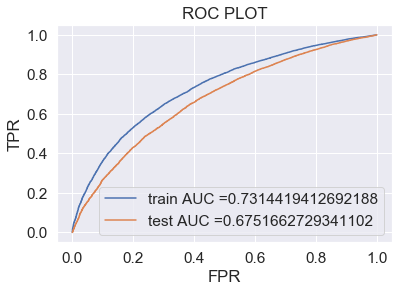

Wall time: 2.84 s


In [100]:
%%time
svm = SGDClassifier(loss='hinge', penalty='l1',alpha=.0001,class_weight='balanced')
svm.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_tr)   
y_test_pred = svm.decision_function(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
#plt.grid()
plt.show()

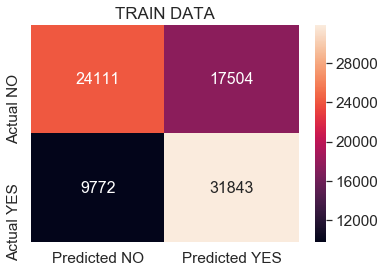

In [101]:
plt.title('TRAIN DATA')
get_confusion_matrix(svm,X_tr,y_train)

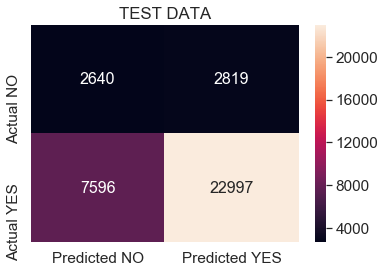

In [102]:
plt.title('TEST DATA')
get_confusion_matrix(svm,X_te,y_test)

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [199]:
X_train_essay_tfidf.shape

(83230, 5000)

In [197]:
from sklearn.decomposition import TruncatedSVD
index = [5,10,50,100,250,500,1000,2500]
variance_sum = []

for i in tqdm(index):
    svd = TruncatedSVD(n_components= i, n_iter=7, random_state=42)
    svd.fit(X_train_essay_tfidf)
    variance_sum.append(svd.explained_variance_ratio_.sum())

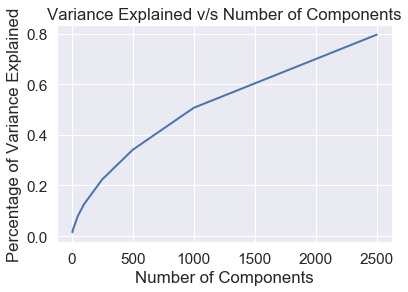

In [200]:
plt.xlabel("Number of Components")
plt.ylabel("Percentage of Variance Explained")
plt.title("Variance Explained v/s Number of Components")
plt.plot(index,variance_sum,lw=2)
plt.show()

* Considering 2500 components, which explains 80% of the variance.

In [132]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2500, n_iter=7, random_state=42)
svd.fit(X_train_essay_tfidf)

svd_train = svd.transform(X_train_essay_tfidf)
svd_test = svd.transform(X_test_essay_tfidf)
svd_cv = svd.transform(X_cv_essay_tfidf)

print("Shape of Train matrix after Decomposition ",svd_train.shape)
print("Shape of Test matrix after Decomposition ",svd_test.shape)
print("Shape of CV matrix after Decomposition ",svd_cv.shape)

Shape of Train matrix after Decomposition  (83230, 2500)
Shape of Test matrix after Decomposition  (36052, 2500)
Shape of CV matrix after Decomposition  (24155, 2500)


In [134]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((svd_train,X_train_cat,X_train_subcat, X_train_state, X_train_prefix, X_train_grade, X_train_price_std,X_train_projects_std,X_train_title_word_count_std,X_train_essay_word_count_std,X_train_quantity_std,pos_train,neg_train,neu_train,comp_train)).tocsr()
X_cr = hstack((svd_cv,X_cv_cat,X_cv_subcat, X_cv_state, X_cv_prefix, X_cv_grade, X_cv_price_std,X_cv_projects_std,X_cv_title_word_count_std,X_cv_essay_word_count_std,X_cv_quantity_std,pos_cv,neg_cv,neu_cv,comp_cv)).tocsr()
X_te = hstack((svd_test,X_test_cat,X_test_subcat, X_test_state, X_test_prefix, X_test_grade, X_test_price_std,X_test_projects_std,X_test_title_word_count_std,X_test_essay_word_count_std,X_test_quantity_std,pos_test,neg_test,neu_test,comp_test)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(83230, 2608) (83230,)
(24155, 2608) (24155,)
(36052, 2608) (36052,)


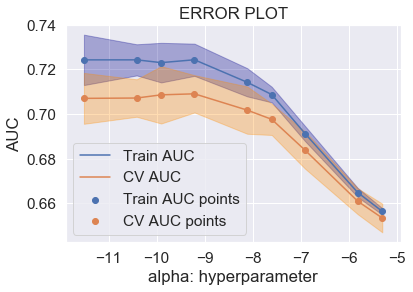

Wall time: 29min 43s
Compiler : 272 ms
Parser   : 682 ms


In [135]:
%%time
log_alpha = []

svm = SGDClassifier(loss='hinge', penalty='l2',class_weight='balanced')
parameters = {'alpha':[0.00001,0.00003,0.00005,0.0001,0.0003, 0.0005, 0.001,0.003, 0.005]}
clf = GridSearchCV(svm, parameters, cv= 10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


for i in parameters['alpha']:
    a = math.log(i)
    log_alpha.append(a)
    
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
#plt.grid()
plt.show()

### Best alpha = .0005

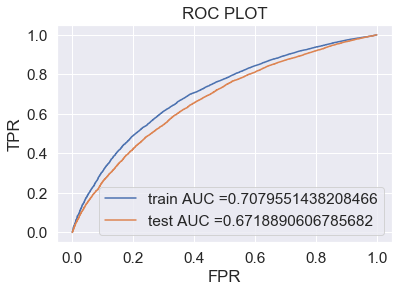

In [137]:
svm = SGDClassifier(loss='hinge', penalty='l2',alpha=.0005,class_weight='balanced')
svm.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_tr)   
y_test_pred = svm.decision_function(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
#plt.grid()
plt.show()

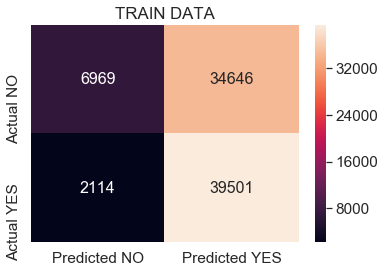

In [138]:
plt.title('TRAIN DATA')
get_confusion_matrix(svm,X_tr,y_train)

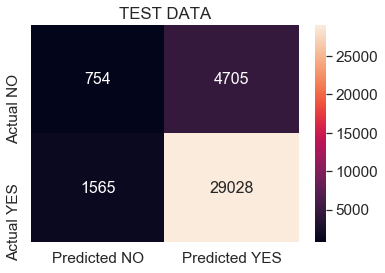

In [139]:
plt.title('TEST DATA')
get_confusion_matrix(svm,X_te,y_test)

## Penalty=L1 reg.

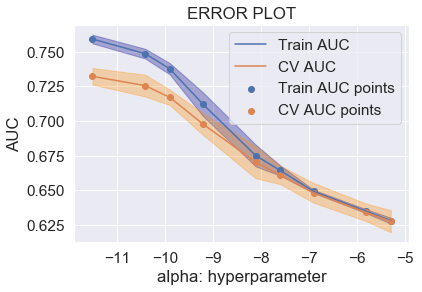

Wall time: 1h 15min 46s


In [140]:
%%time
log_alpha = []

svm = SGDClassifier(loss='hinge', penalty='l1',class_weight='balanced')
parameters = {'alpha':[0.00001,0.00003,0.00005,0.0001,0.0003, 0.0005, 0.001,0.003, 0.005]}
clf = GridSearchCV(svm, parameters, cv= 10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


for i in parameters['alpha']:
    a = math.log(i)
    log_alpha.append(a)
    
plt.plot(log_alpha, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alpha,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOT")
#plt.grid()
plt.show()

### Best alpha = .0001

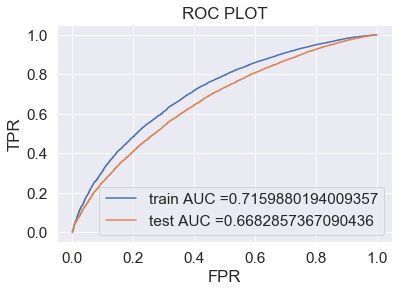

In [143]:
svm = SGDClassifier(loss='hinge', penalty='l1',alpha=.0001,class_weight='balanced')
svm.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = svm.decision_function(X_tr)   
y_test_pred = svm.decision_function(X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
#plt.grid()
plt.show()

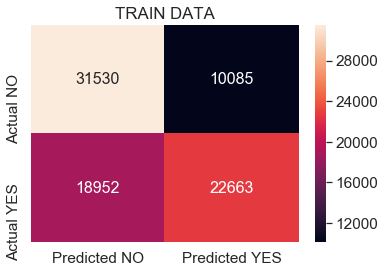

In [144]:
plt.title('TRAIN DATA')
get_confusion_matrix(svm,X_tr,y_train)

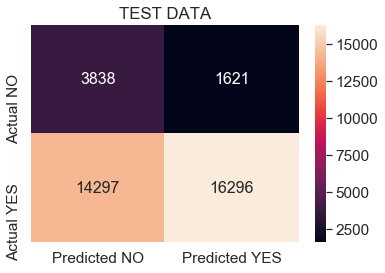

In [145]:
plt.title('TEST DATA')
get_confusion_matrix(svm,X_te,y_test)

<h1>3. Conclusions</h1>

In [146]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Penalty","Alpha:Hyper Parameter", "AUC"]

x.add_row(["BOW", "Linear SVM","L1", 0.0001, 0.67])
x.add_row(["BOW", "Linear SVM","L2", 0.05, 0.67])
x.add_row(["TFIDF", "Linear SVM", "L1",0.0001, 0.67])
x.add_row(["TFIDF", "Linear SVM", "L2",0.0005, 0.67])
x.add_row(["AVG W2V", "Linear SVM", "L1", 0.0005, 0.71])
x.add_row(["AVG W2V", "Linear SVM", "L2", 0.005, 0.70])
x.add_row(["TFIDF W2V", "Linear SVM", "L1", 0.0003, 0.68])
x.add_row(["TFIDF W2V", "Linear SVM", "L2", 0.001, 0.69])
x.add_row(["TRUNCATED SVD", "Linear SVM", "L1", 0.0001, 0.67])
x.add_row(["TRUNCATED SVD", "Linear SVM", "L2", 0.0005, 0.67])

print(x)

+---------------+------------+---------+-----------------------+------+
|   Vectorizer  |   Model    | Penalty | Alpha:Hyper Parameter | AUC  |
+---------------+------------+---------+-----------------------+------+
|      BOW      | Linear SVM |    L1   |         0.0001        | 0.67 |
|      BOW      | Linear SVM |    L2   |          0.05         | 0.67 |
|     TFIDF     | Linear SVM |    L1   |         0.0001        | 0.67 |
|     TFIDF     | Linear SVM |    L2   |         0.0005        | 0.67 |
|    AVG W2V    | Linear SVM |    L1   |         0.0005        | 0.71 |
|    AVG W2V    | Linear SVM |    L2   |         0.005         | 0.7  |
|   TFIDF W2V   | Linear SVM |    L1   |         0.0003        | 0.68 |
|   TFIDF W2V   | Linear SVM |    L2   |         0.001         | 0.69 |
| TRUNCATED SVD | Linear SVM |    L1   |         0.0001        | 0.67 |
| TRUNCATED SVD | Linear SVM |    L2   |         0.0005        | 0.67 |
+---------------+------------+---------+-----------------------+